In [22]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
def time_deallocation(memory_block_size):
    """
    Sets up the time latency when deallocation a memory bloc size.
    """
    alpha = 0.1 # May range from 0.1 to 0.5
    beta = 1 # May range from 0 - 1
    return (memory_block_size * alpha)/1000 + beta

## Fixed partition

In [3]:
# Generate random indices
NUM_JOBS = 30

In [4]:
np.linspace(1, 100, 10, dtype='int')

array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])

In [5]:
def generate_fixed_partition_dataframe(num_jobs):
    random_memory_locations = np.linspace(1, 15000, NUM_JOBS, dtype='int')
    random_job_status = np.random.randint(0, 2, NUM_JOBS)
    memory_block_size = []
    
    for i in range(len(random_memory_locations) - 1):
        memory_block_size.append(random_memory_locations[i+1] - random_memory_locations[i])
    memory_block_size.append(np.random.randint(1, 1000, 1)[0])
    return pd.DataFrame({"Memory Address": random_memory_locations, 
                            "Memory Block Size": memory_block_size,
                            "Job Status": random_job_status})

In [44]:
df = generate_fixed_partition_dataframe(NUM_JOBS)
df

,Memory Address,Memory Block Size,Job Status
0,1,517,1
1,518,517,1
2,1035,517,1
3,1552,517,1
4,2069,518,0
5,2587,517,0
6,3104,517,1
7,3621,517,1
8,4138,517,1
9,4655,518,0


In [67]:
df['Job Status'].value_counts()

1    18
0    12
Name: Job Status, dtype: int64

In [7]:
def deallocate_fixed(df):
    deallocated_memory_count = 0
    for i in range(len(df)):
        if df["Job Status"].loc[i] == 1:
            # Simulating Fixed partition deallocation
            print(f"Deallocating Memory for Memory Address: {df['Memory Address'].loc[i]}...")
            time = 
            time.sleep(time_deallocation(df["Memory Block Size"].loc[i]))
            df["Job Status"].loc[i] = 0
            deallocated_memory_count += 1
    print(f"Total memory deallocated: {deallocated_memory_count}")

deallocate_fixed(df)

Deallocating Memory for Memory Address: 1...
Deallocating Memory for Memory Address: 518...
Deallocating Memory for Memory Address: 1552...
Deallocating Memory for Memory Address: 3104...
Deallocating Memory for Memory Address: 3621...
Deallocating Memory for Memory Address: 6207...
Deallocating Memory for Memory Address: 6724...
Deallocating Memory for Memory Address: 8276...
Deallocating Memory for Memory Address: 8793...
Deallocating Memory for Memory Address: 9827...
Deallocating Memory for Memory Address: 10862...
Deallocating Memory for Memory Address: 11379...
Deallocating Memory for Memory Address: 13448...
Deallocating Memory for Memory Address: 14482...
Deallocating Memory for Memory Address: 15000...
Total memory deallocated: 15


In [90]:
time_deallocation(df["Memory Block Size"].loc[1])

1.0517

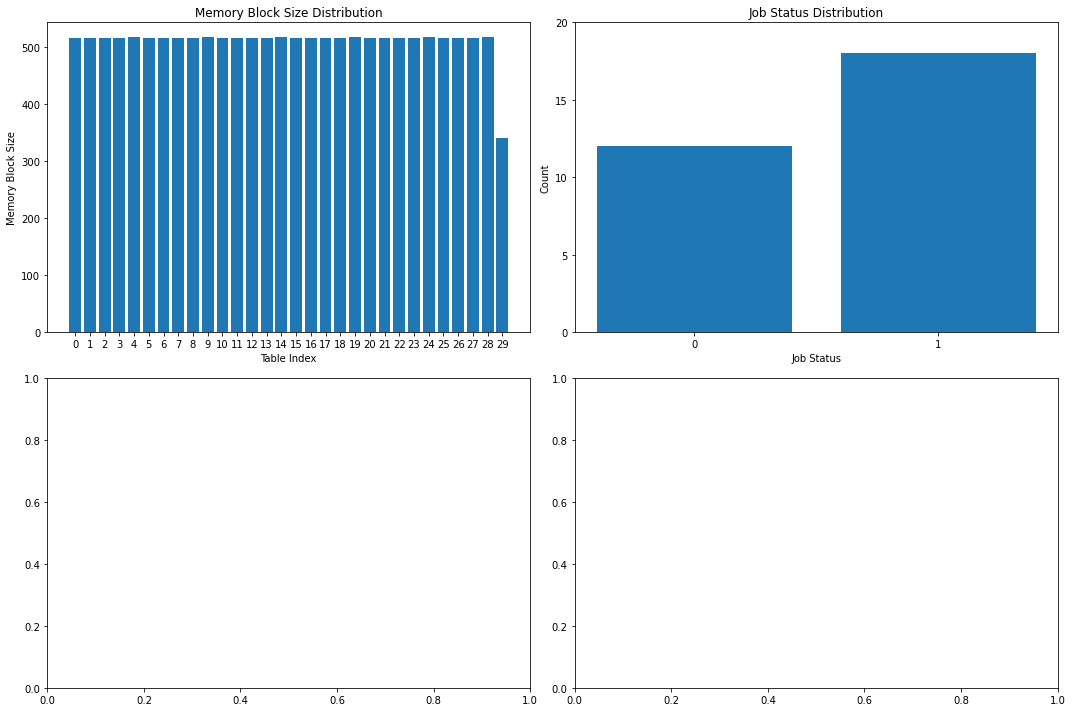

In [86]:
fig, ax = plt.subplots(2,2,figsize=(15, 10))
ax[0, 0].bar(x=df.index, height=df['Memory Block Size']);
ax[0, 0].set_xticks(range(30))
ax[0, 0].set_xlabel('Table Index')
ax[0, 0].set_ylabel('Memory Block Size')
ax[0, 0].set_title('Memory Block Size Distribution')

ax[0, 1].bar(x = [1, 0], height=df['Job Status'].value_counts())
ax[0, 1].set_xticks([1, 0]);
ax[0, 1].set_yticks(range(0, 25, 5))
ax[0, 1].set_xlabel('Job Status')
ax[0, 1].set_ylabel('Count')
ax[0, 1].set_title('Job Status Distribution')



plt.tight_layout()

In [8]:
df

,Memory Address,Memory Block Size,Job Status
0,1,517,0
1,518,517,0
2,1035,517,0
3,1552,517,0
4,2069,518,0
5,2587,517,0
6,3104,517,0
7,3621,517,0
8,4138,517,0
9,4655,518,0


## Dynamic Partition

In [9]:
def generate_dynamic_partition_dataframe(num_jobs, case1=False, case2=False, case3=False):
    random_memory_locations = sorted(np.random.randint(1, 10000, num_jobs))
    random_job_status = np.random.randint(0, 2, num_jobs)
    memory_block_size = []
    
    for i in range(len(random_memory_locations) - 1):
        memory_block_size.append(random_memory_locations[i+1] - random_memory_locations[i])
    memory_block_size.append(np.random.randint(1, 1000, 1)[0])
    
    if case1:
        random_job_status[-1] = 0
        
    if case2:
        random_job_status = [0 if num % 2 == 0 else 1 for num in range(num_jobs)]
        random_job_status[-1] = 0
        random_job_status[0] = 0
        
    if case3:
        random_job_status[2] = 1
        random_job_status[1] = 1
        random_job_status[0] = 1
        
    
    return pd.DataFrame({"Memory Address": random_memory_locations, 
                         "Memory Block Size": memory_block_size,
                         "Job Status": random_job_status})

### Case 1

In [10]:
# Generate random dataframe
df_case_1 = generate_dynamic_partition_dataframe(30, case1=True)
df_case_1

,Memory Address,Memory Block Size,Job Status
0,165,4,0
1,169,54,0
2,223,377,0
3,600,4,1
4,604,504,1
5,1108,166,0
6,1274,118,0
7,1392,427,0
8,1819,99,1
9,1918,324,1


In [11]:
def deallocate_dynamic_case_1(df):
    initial_len = len(df["Memory Address"])
    deallocated_memory_count = 0
    iterations = 1
    
    while df["Job Status"].nunique() != 1:
        print(f"Iteration Number: {iterations}")
        rows_to_drop = []
        for i in range(len(df) - 1):
            if df["Job Status"].loc[i] == 1 and df["Job Status"].loc[i + 1] == 0:
                # Simulating case 1 dyanmic partition deallocation
                print(f"\tDeallocating Memory for Memory Address: {df['Memory Address'].loc[i]}...")
                print(f"\tJoining Memory Address {df['Memory Address'].loc[i]} and {df['Memory Address'].loc[i + 1]}\n")
                
                # Freeing job status
                df["Job Status"].loc[i] = 0

                # Joining memory address block sizes
                df["Memory Block Size"].loc[i] += df["Memory Block Size"].loc[i+1]

                # Putting the next memory address to rows to drop
                rows_to_drop.append(i + 1)

                # Memory deallocation time latency
                time.sleep(time_deallocation(df["Memory Block Size"].loc[i]))
                
        df.drop(rows_to_drop, inplace=True)
        df.reset_index(inplace=True, drop=True)
        iterations +=1
    print(f"Total memory deallocated: {initial_len - len(df['Memory Address'])}.")

In [12]:
deallocate_dynamic_case_1(df_case_1)

Iteration Number: 1
	Deallocating Memory for Memory Address: 604...
	Joining Memory Address 604 and 1108

	Deallocating Memory for Memory Address: 3809...
	Joining Memory Address 3809 and 4904

	Deallocating Memory for Memory Address: 5740...
	Joining Memory Address 5740 and 5755

	Deallocating Memory for Memory Address: 7407...
	Joining Memory Address 7407 and 7573

	Deallocating Memory for Memory Address: 8818...
	Joining Memory Address 8818 and 9908

Iteration Number: 2
	Deallocating Memory for Memory Address: 600...
	Joining Memory Address 600 and 604

	Deallocating Memory for Memory Address: 3595...
	Joining Memory Address 3595 and 3809

	Deallocating Memory for Memory Address: 5563...
	Joining Memory Address 5563 and 5740

	Deallocating Memory for Memory Address: 6945...
	Joining Memory Address 6945 and 7407

	Deallocating Memory for Memory Address: 8055...
	Joining Memory Address 8055 and 8818

Iteration Number: 3
	Deallocating Memory for Memory Address: 2733...
	Joining Memory 

In [13]:
df_case_1

,Memory Address,Memory Block Size,Job Status
0,165,4,0
1,169,54,0
2,223,377,0
3,600,674,0
4,1274,118,0
5,1392,427,0
6,1819,3217,0
7,5036,186,0
8,5222,1396,0
9,6618,100,0


### Case 2: Joining Three Free Blocks

In [14]:
df_case_2 = generate_dynamic_partition_dataframe(NUM_JOBS, case2=True)
print(df_case_2['Memory Block Size'].sum())
df_case_2

10392


,Memory Address,Memory Block Size,Job Status
0,220,60,0
1,280,87,1
2,367,326,0
3,693,155,1
4,848,1400,0
5,2248,103,1
6,2351,34,0
7,2385,338,1
8,2723,1710,0
9,4433,80,1


In [15]:
def deallocate_dynamic_case_2(df, remove_null=False):
    deallocated_memory_count = 0
    iterations = 1
    initial_len = len(df["Memory Address"])
 
    rows_to_drop = []
    for i in range(1, len(df) - 2):
        if df["Job Status"].loc[i] == 1 and df["Job Status"].loc[i + 1] == 0 and df["Job Status"].loc[i - 1] == 0:
            # Simulating case 2 dyanmic partition deallocation
            print(f"Deallocating Memory for Memory Address: {df['Memory Address'].loc[i]}...")
            print(f"Joining Memory Address {df['Memory Address'].loc[i-1]}, {df['Memory Address'].loc[i]} and {df['Memory Address'].loc[i+1]}\n")
                
            # Freeing job status
            df["Job Status"].loc[i] = 0

            # Joining memory address block sizes
            df["Memory Block Size"].loc[i-1] += df["Memory Block Size"].loc[i]
            df["Memory Block Size"].loc[i-1] += df["Memory Block Size"].loc[i+1]

            # Putting the next memory address to rows to drop
            rows_to_drop.append(i + 1)
                
            # Replace current memory location to a null entry
            df.loc[i, "Memory Address"] = "*"
            df.loc[i, "Memory Block Size"] = 0
            df.loc[i, "Job Status"] = None
            df.loc[i+1, "Job Status"] = 1

            time.sleep(time_deallocation(df['Memory Block Size'].loc[i]))
    df.drop(rows_to_drop, inplace=True)
    df.reset_index(inplace=True, drop=True)
    iterations +=1
    
    if remove_null:
    # Removing Null Entries
        print(f"Removing Null Entries...")
        null_entries = df[df['Job Status'].isna()].index
        time.sleep(len(null_entries))
        df.drop(null_entries, inplace=True)
        print(f"Total number of null entries removed: {len(null_entries)}")
        df.reset_index(inplace=True, drop=True)
    print(f"Total memory deallocated: {initial_len - len(df['Memory Address'])}.")

In [16]:
deallocate_dynamic_case_2(df_case_2)

Deallocating Memory for Memory Address: 280...
Joining Memory Address 220, 280 and 367

Deallocating Memory for Memory Address: 2248...
Joining Memory Address 848, 2248 and 2351

Deallocating Memory for Memory Address: 4433...
Joining Memory Address 2723, 4433 and 4513

Deallocating Memory for Memory Address: 5965...
Joining Memory Address 5388, 5965 and 6165

Deallocating Memory for Memory Address: 6588...
Joining Memory Address 6510, 6588 and 6936

Deallocating Memory for Memory Address: 7784...
Joining Memory Address 7521, 7784 and 8048

Deallocating Memory for Memory Address: 8860...
Joining Memory Address 8232, 8860 and 9399

Total memory deallocated: 7.


In [17]:
df_case_2

,Memory Address,Memory Block Size,Job Status
0,220,473,0.0
1,*,0,NaN
2,693,155,1.0
3,848,1537,0.0
4,*,0,NaN
5,2385,338,1.0
6,2723,2151,0.0
7,*,0,NaN
8,4874,514,1.0
9,5388,949,0.0


### Case 3: Deallocating an Isolated Block

In [18]:
df_case_3 = generate_dynamic_partition_dataframe(NUM_JOBS, case3=True)
print(df_case_3['Memory Block Size'].sum())
df_case_3

10382


,Memory Address,Memory Block Size,Job Status
0,377,155,1
1,532,31,1
2,563,394,1
3,957,136,1
4,1093,129,0
5,1222,67,0
6,1289,968,0
7,2257,29,0
8,2286,20,0
9,2306,78,1


In [19]:
from IPython.display import display

def deallocate_dynamic_case_3(df, freeing_latency=2):
    initial_df = df.copy()
    
    for i in range(1, len(df) - 2):
        if df["Job Status"].loc[i] == 1 and df["Job Status"].loc[i + 1] == 1 and df["Job Status"].loc[i - 1] == 1:
            # Simulating case 2 dyanmic partition deallocation
            print(f"Deallocating Memory for Memory Address: {df['Memory Address'].loc[i]}...")
            print(f"Found two adjacent busy job status for Memory Address {df['Memory Address'].loc[i]}:")
            print(f"\t{df['Memory Address'].loc[i-1]}")
            print(f"\t{df['Memory Address'].loc[i+1]}")
                
            # Converting Current Memory as null entry
            df.loc[i, "Memory Address"] = "*"
            df.loc[i, "Memory Block Size"] = 0
            df.loc[i, "Job Status"] = None

            time.sleep(time_deallocation(df['Memory Block Size'].loc[i]))

    memory_deallocated = 0
    display(df)
    free_null = input("Free Null Memories: [y/N]: ")
    if free_null == 'y':

        # Free Null Entries
        print(f"Freeing Null Entries...")
        time.sleep(freeing_latency)
        for i in range(1, len(df) - 2):
            if df['Job Status'].isna().values[i]:
                
                print(f"Now catering memory address: {initial_df['Memory Address'].loc[i]}")
                print(f"Waiting for adjacent memory address to be deallocated...")
                
                # Deallocating previous adjacent memory address
                df.loc[i-1, "Job Status"] = 0
                time.sleep(freeing_latency)
                print(f"\tAjacent memory address {df['Memory Address'].loc[i-1]} is now free!")
                
                
                # Deallocating next adjacent memory address
                df.loc[i+1, "Job Status"] = 0
                time.sleep(freeing_latency)
                print(f"\tAdjacent memory address {df['Memory Address'].loc[i+1]} is now free!\n")
                
                # Re-entry of the previously nulled memory address
                print(f"Reallocating memory address {initial_df['Memory Address'].loc[i]} to *\n")
                time.sleep(freeing_latency)
                
                # Deallocating the current memory address
                df.loc[i, "Memory Address"] = initial_df["Memory Address"].loc[i]
                df.loc[i, "Memory Block Size"] = initial_df["Memory Block Size"].loc[i]
                df.loc[i, "Job Status"] = 0
                time.sleep(freeing_latency)
                print(f"\tAdjacent memory address {df['Memory Address'].loc[i]} is now free!\n")
                
                memory_deallocated+=3
                
        df['Job Status'] = df['Job Status'].apply(lambda x: int(x))
    print(f"Total memory deallocated: {memory_deallocated}")
    

In [20]:
deallocate_dynamic_case_3(df_case_3)

Deallocating Memory for Memory Address: 532...
Found two adjacent busy job status for Memory Address 532:
	377
	563
Deallocating Memory for Memory Address: 3480...
Found two adjacent busy job status for Memory Address 3480:
	3179
	3899


,Memory Address,Memory Block Size,Job Status
0,377,155,1.0
1,*,0,NaN
2,563,394,1.0
3,957,136,1.0
4,1093,129,0.0
5,1222,67,0.0
6,1289,968,0.0
7,2257,29,0.0
8,2286,20,0.0
9,2306,78,1.0


Free Null Memories: [y/N]: Y
Total memory deallocated: 0


In [21]:
df_case_3

,Memory Address,Memory Block Size,Job Status
0,377,155,1.0
1,*,0,NaN
2,563,394,1.0
3,957,136,1.0
4,1093,129,0.0
5,1222,67,0.0
6,1289,968,0.0
7,2257,29,0.0
8,2286,20,0.0
9,2306,78,1.0
